Instalamos las librerias

In [ ]:
!pip install google-generativeai langchain-google-genai pandas sentence-transformers chromadb

# Llamada a la api de gemini directo

In [ ]:
import google.generativeai as genai

# Configura tu clave de API
genai.configure(api_key="APIKEY")

# 🔹 Seleccionamos el modelo de Gemini 2.0 Flash
model = genai.GenerativeModel('gemini-2.0-flash')

# 🔹 Configuración del modelo
config = {
    "temperature": 0.7,  # Controla la creatividad (0 = respuestas predecibles, 1 = más aleatorio)
    "top_p": 0.8,        # Controla la diversidad de las respuestas
    "max_output_tokens": 500  # Máximo de tokens en la respuesta
}

# 🔹 Ejemplo de consulta
prompt = "Explica en 20 palabras qué es un modelo de lenguaje y cómo se usa en la industria."

# 🔹 Generamos la respuesta
response = model.generate_content(prompt, generation_config=config)

# 🔹 Mostramos la respuesta generada por Gemini
print(response.text)

c:\Users\Pedro\Desktop\proyectos_25\introllm\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Un modelo de lenguaje es un programa que predice texto. Se usa para chatbots, traducción, generación de contenido y análisis de sentimientos.



# Promts estructurados para el etiquetado de datos.

Creamos la template para estructurar el prompt

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Configurar el modelo Gemini con LangChain
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",  
    temperature=0.2,  
    max_output_tokens=500,  
    google_api_key="nuestraapikey"
)

# Definir el template del prompt
prompt_template = PromptTemplate(
    input_variables=["comentario"],
    template=(
        "Clasifica el siguiente comentario en una de las tres categorías: \n"
        "- Positivo (si es favorable al tráiler de Superman)\n"
        "- Negativo (si es una crítica o rechazo)\n"
        "- Neutral (si no expresa una postura clara)\n\n"
        "Comentario: {comentario}\n\n"
        "Devuelve solo la categoría exacta (Positivo, Negativo o Neutral)."
    )
)

# Definir la cadena de clasificación en LangChain
etiquetado_chain = LLMChain(llm=llm, prompt=prompt_template)

Cargamos los comentarios y extraemos una muestra aleatoria de 100 textos.

In [ ]:
import pandas as pd

# Cargar archivo CSV con los comentarios
df = pd.read_csv(r"comentarios.csv")

# Seleccionar la columna de comentarios
columna_comentarios = "textDisplay"

# Extraer una muestra de 100 comentarios aleatorios
muestra_prueba = df.sample(100, random_state=42)[columna_comentarios].tolist()


Corremos el etiquetador.

In [ ]:
import time
from langchain.chains import LLMChain

# Aplicar clasificación con la cadena de LangChain
resultados_prueba = []

for comentario in muestra_prueba:
    categoria = etiquetado_chain.invoke({"comentario": comentario})
    resultados_prueba.append({"Comentario": comentario, "Categoría": categoria["text"]})
    time.sleep(1.5)  # Evitar saturación de la API

# Convertir resultados a DataFrame y guardarlos
df_resultados_prueba = pd.DataFrame(resultados_prueba)
df_resultados_prueba.to_csv("resultados_etiquetados.csv", index=False)

print(df_resultados_prueba)


Para finalizar, vamos a visualizar frecuencias relaticas

In [ ]:
# Cargamos el archivo
file_path = "resultados_etiquetados.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas para entender la estructura de los datos
df.head()


,Comentario,Categoría
0,Ahora a Superman lo salva un perro. ¿Qué chorr...,Negativo
1,Una ola de lagrimas de Snyder retards se acerca 😂,Negativo
2,"En serio, puedes seguir hateando, pero la gran...",Positivo
3,Ok snydertard,Negativo
4,😢❤❤❤❤,Positivo


In [4]:
# Calcular las frecuencias relativas de cada categoría
frecuencias_relativas = df['Categoría'].value_counts(normalize=True) * 100

# Convertir a DataFrame para visualización
frecuencias_df = frecuencias_relativas.reset_index()
frecuencias_df.columns = ['Categoría', 'Frecuencia Relativa (%)']

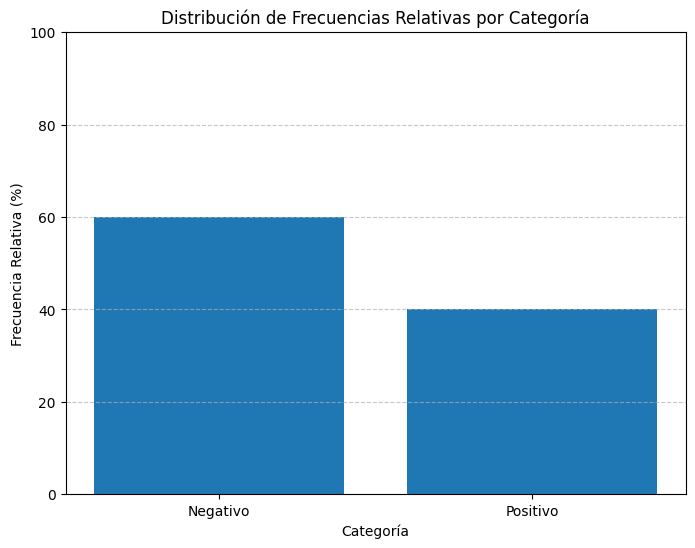

In [5]:
import matplotlib.pyplot as plt

# Crear la visualización elegante de las frecuencias relativas
plt.figure(figsize=(8, 6))
plt.bar(frecuencias_df['Categoría'], frecuencias_df['Frecuencia Relativa (%)'])

# Personalización del gráfico
plt.xlabel("Categoría")
plt.ylabel("Frecuencia Relativa (%)")
plt.title("Distribución de Frecuencias Relativas por Categoría")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()